In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Question 3


## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [3]:
image = cv2.imread('img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalized_image = cv2.equalizeHist(output_image)

(-0.5, 383.5, 287.5, -0.5)

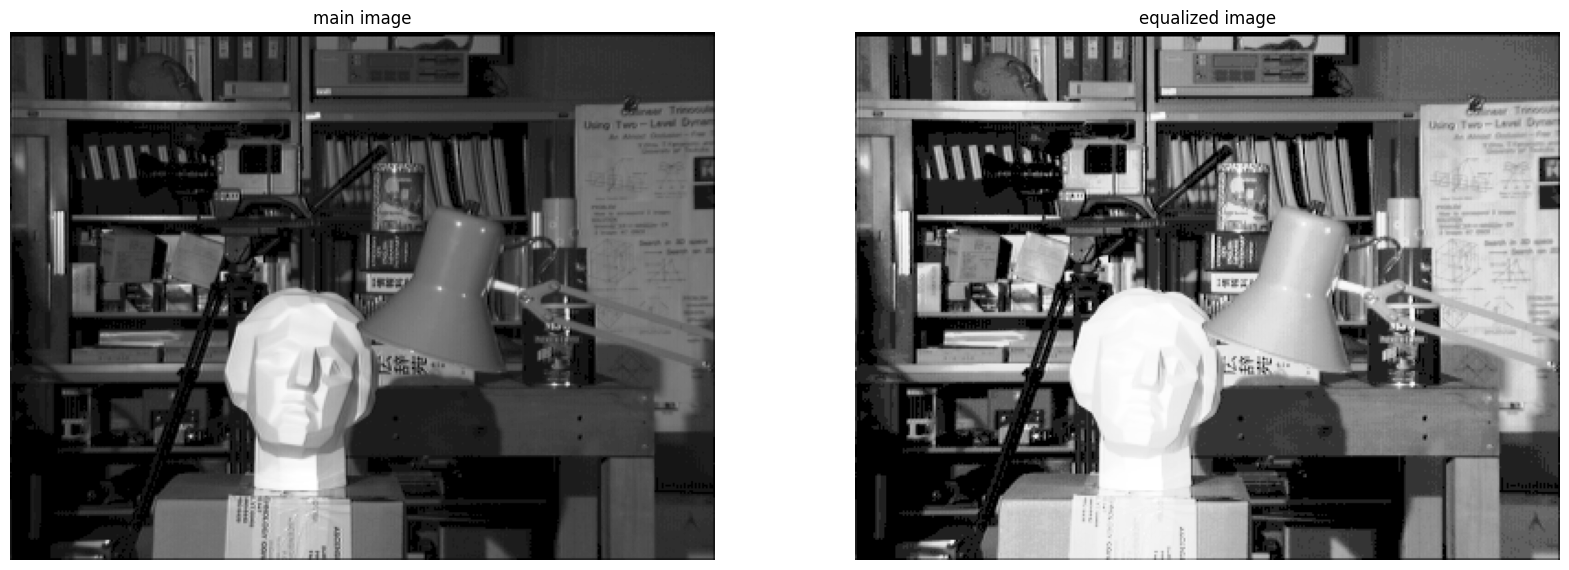

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b1


<h3> in this section we want to implement the first method for ACE </h3>
<h3> you are free to use opencv library </h3>


In [5]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x, y = image.shape
  output_image = image.copy()
  rows = x // gridSize
  cols = y // gridSize
  for i in range(rows):
      for j in range(cols):
          grid = image[i * gridSize:(i + 1) * gridSize, j * gridSize:(j + 1) * gridSize]
          transformed_grid = cv2.equalizeHist(grid)
          output_image[i * gridSize:(i + 1) * gridSize, j * gridSize:(j + 1) * gridSize] = transformed_grid

  return output_image

(-0.5, 383.5, 287.5, -0.5)

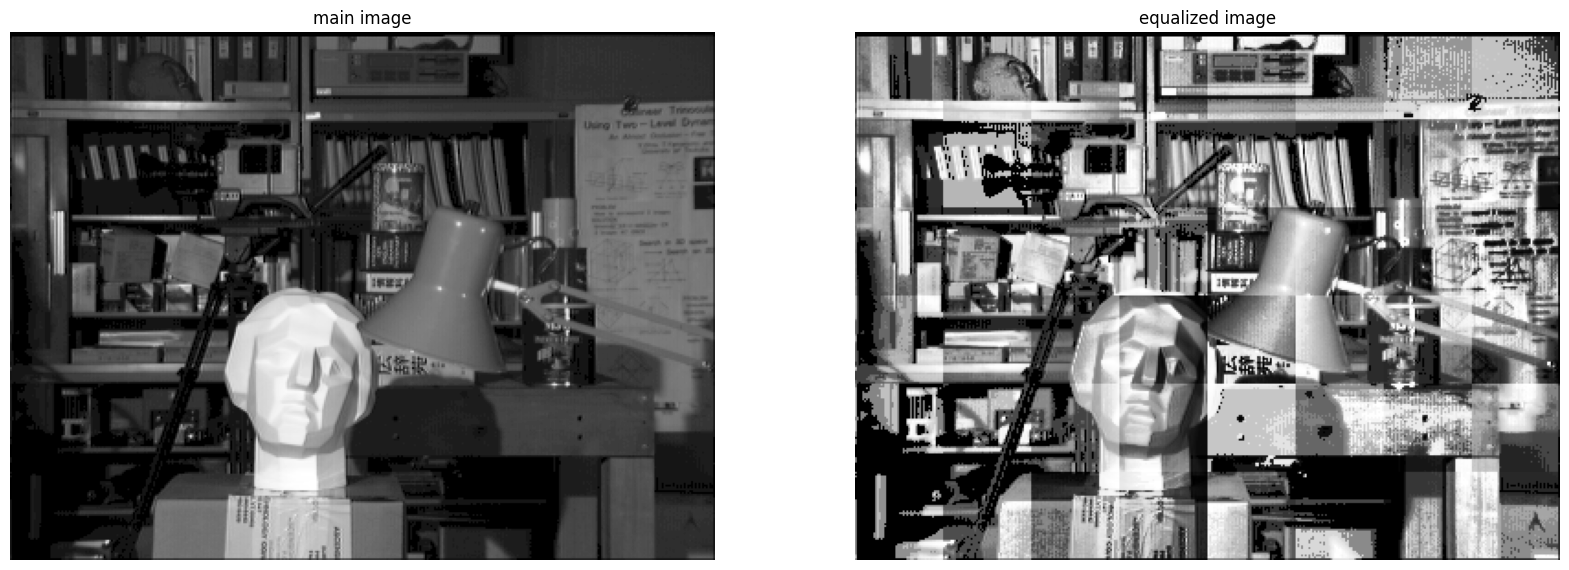

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b2

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you are free to use opencv library </h3>

In [8]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    x, y  = gridSize[0], gridSize[1]
    left = int(y/2)
    right = y - left - 1
    top = int(x/2)
    bottom = x - top - 1
    grid = np.zeros(3)
    padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, None, grid)
    for i in range(image.shape[0]):
      for j in range (image.shape[1]):
        output[i][j] = cv2.equalizeHist(padded_image[i : i + gridSize[0], j : j + gridSize[1]])[top][left]

    return output

(-0.5, 383.5, 287.5, -0.5)

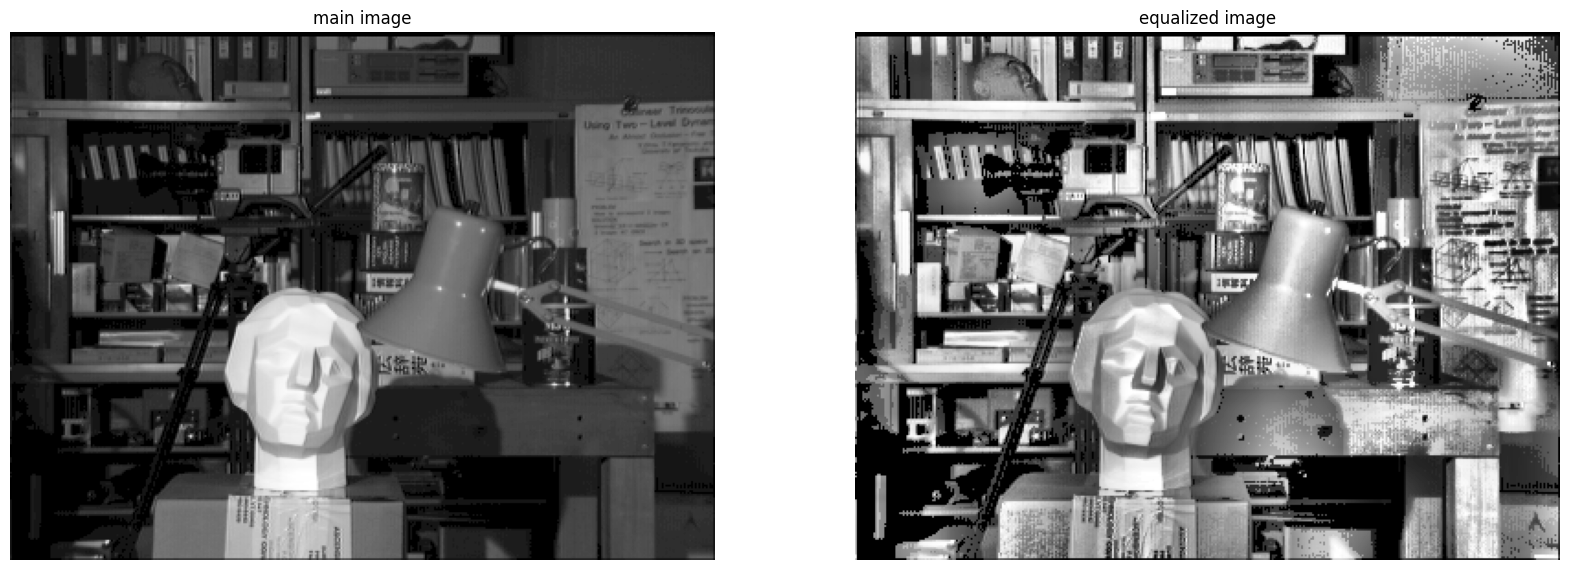

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b3

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [11]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    def Equalize(image, clip_limit):
      output = image.copy()
      hist = cv2.calcHist([image], [0], None, [256], [0, 256])
      # subtracts the clip_limit value from each bin of the histogram and sets any negative values to zero 
      treshold = np.maximum(hist - clip_limit, 0) / 256 
      hist = np.minimum(hist, 100) #  makes sure that all bins are less than or equal to 100
      hist += np.sum(treshold) #  adds the sum of the thresholded histogram to the original histogram
      cdf = np.cumsum(hist) / np.sum(hist) 
      normalized_cdf = np.round(cdf * 255).astype(np.uint8) # normalized cdf
      flat_image = output.flatten() #  flattens the image into a single array
      flat_image = normalized_cdf[flat_image] #  applies lookup table to the flattened image
      output = flat_image.reshape((image.shape[0], image.shape[1]))  # reshapes the image back to its original
      return output

    output = image.copy()
    w, h = image.shape[:2]
    nw, nh = gridSize
    top = nh // 2
    bottom = nh - top
    left = nw // 2
    right = nw - left
    padded_img = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT)  # apply padding
    output = np.zeros_like(image)
    for i in range(w):
        for j in range(h):
            grid = padded_img[i: i + nh, j: j + nw] # make a grid consisting the pixel [i, j]
            equalized_grid = Equalize(grid, clip_limit) # apply main function of CLAHE to that grid
            output[i,j] = equalized_grid[top,bottom] # replace the equalized grid with the related region of the main pic
    return output

(-0.5, 383.5, 287.5, -0.5)

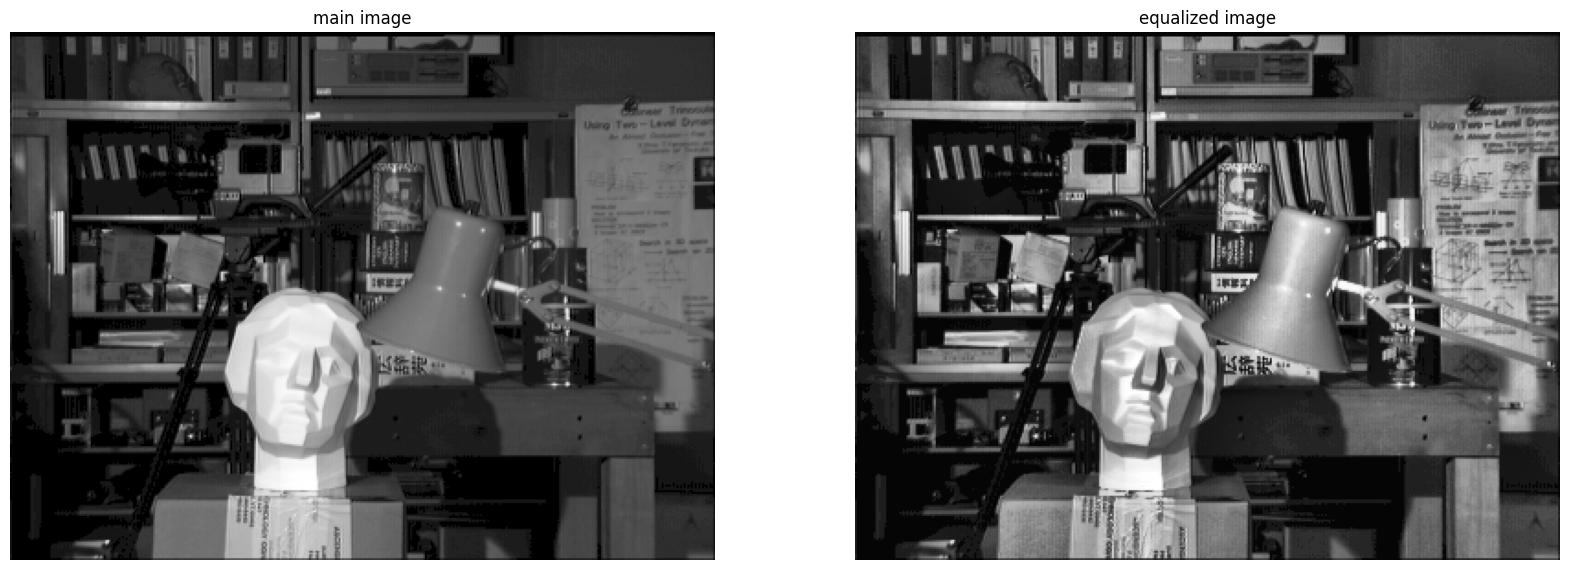

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

# part c


<h3> in this section we want to implement CLAHE using opencv </h3>


In [20]:
def CLAHE(image, gridSize, clipLimit):
    '''
    use opencv library for CLAHE.
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    # if len(image.shape) > 2:
    #     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit, tileGridSize=gridSize)    
    output = clahe.apply(image)
    return output

<h3> run the following sections to answer part c </h3>


(-0.5, 383.5, 287.5, -0.5)

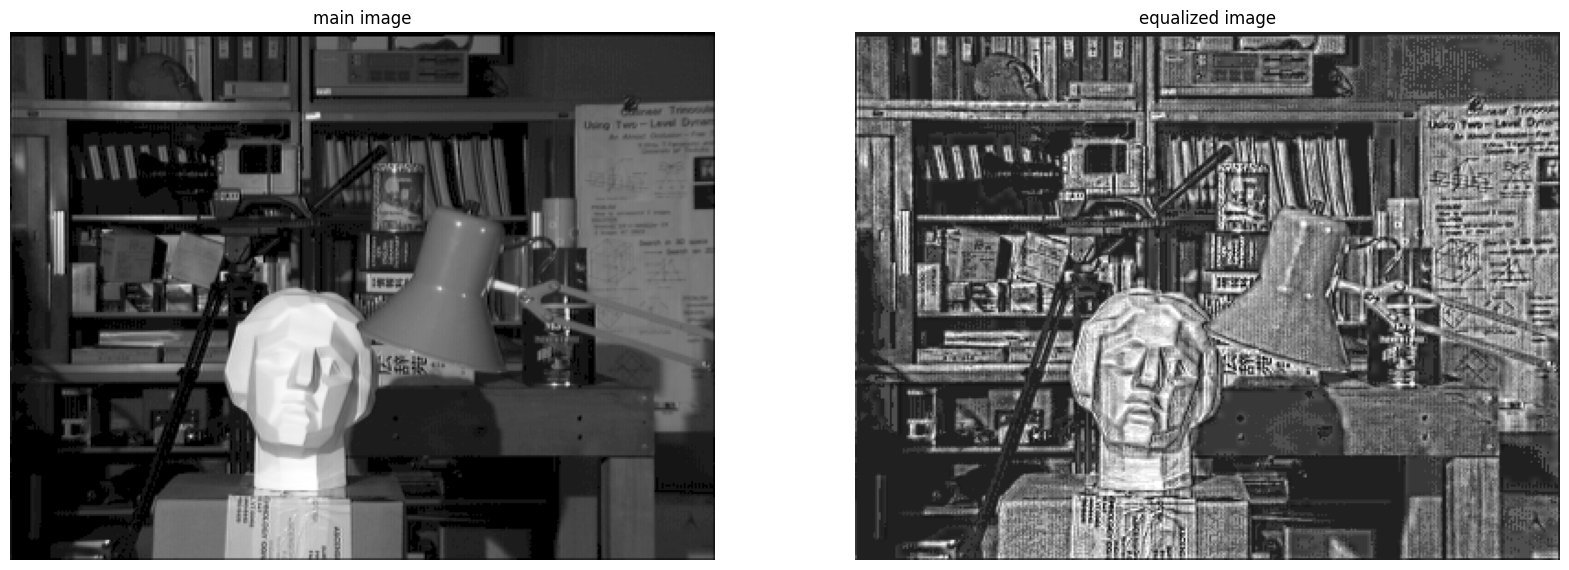

In [25]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image1 = CLAHE(image,(128,128), 2)
plt.imshow(output_image1, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

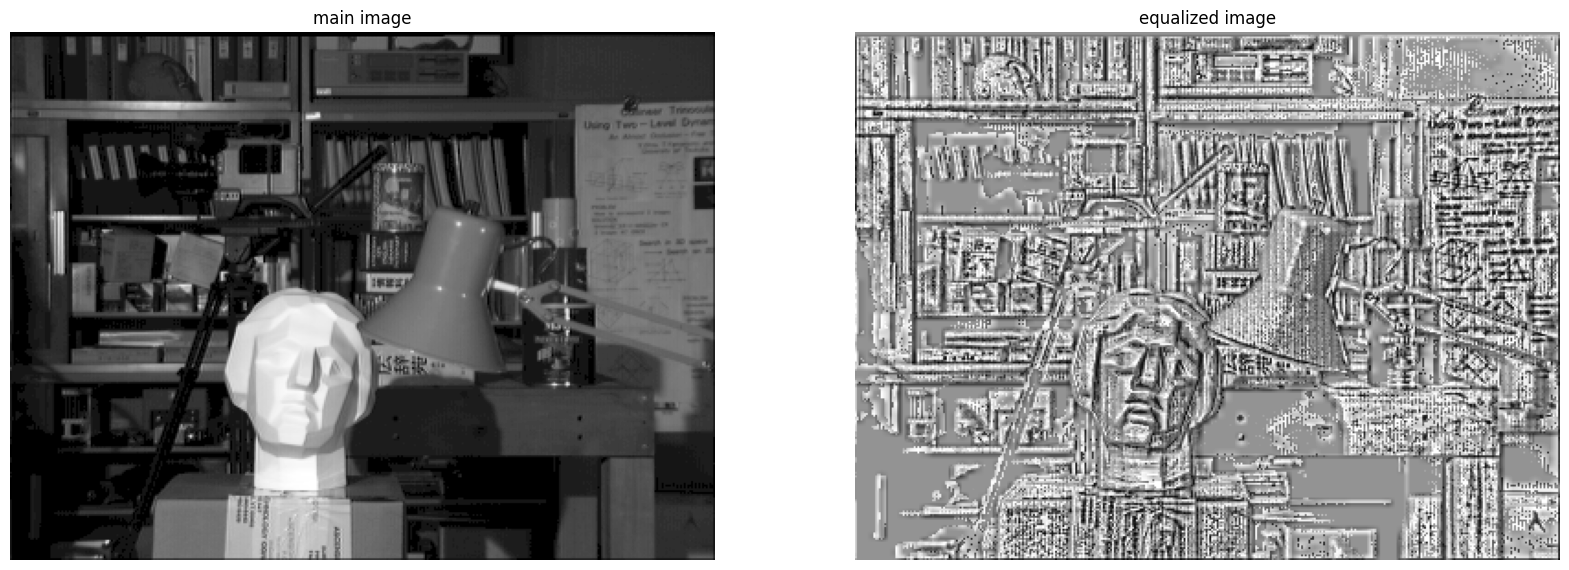

In [22]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image2 = CLAHE(image,(128,128), 128)
plt.imshow(output_image2, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

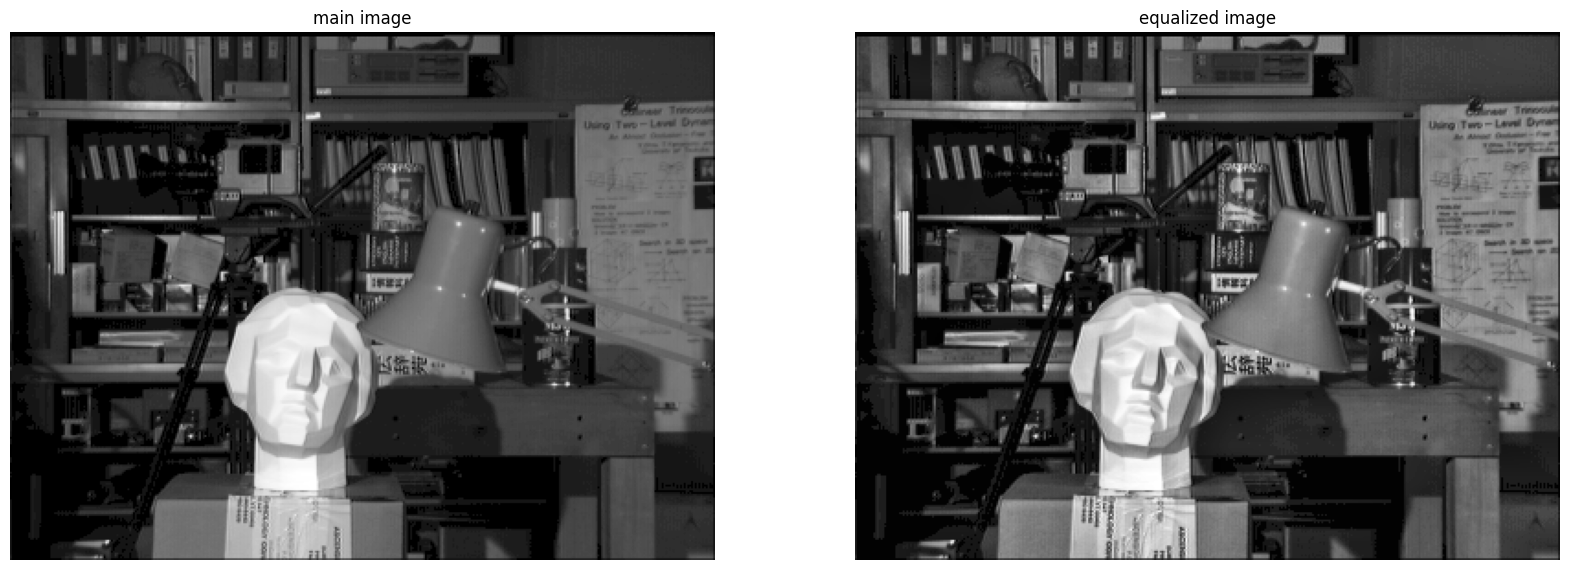

In [32]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image3 = CLAHE(image,(16,16), 2)
plt.imshow(output_image3, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

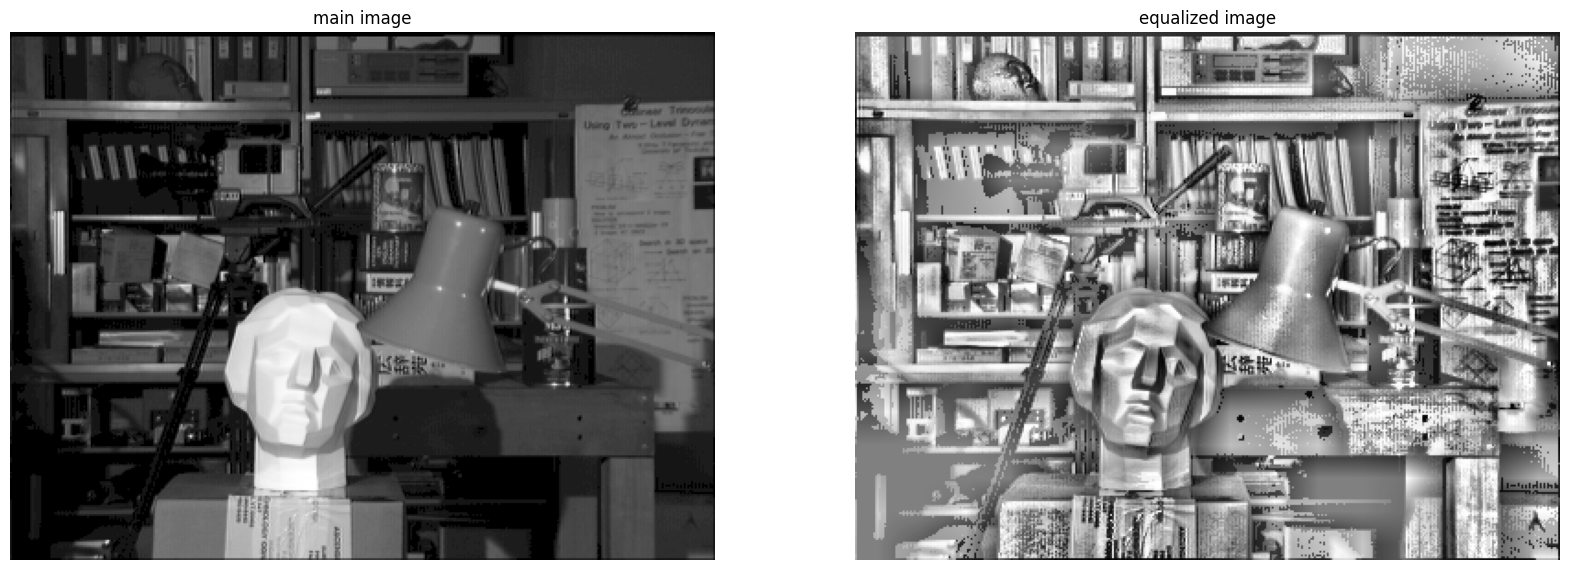

In [24]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image4 = CLAHE(image,(16,16), 128)
plt.imshow(output_image4, cmap='gray')
plt.title('equalized image')
plt.axis('off')